In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense , Flatten , MaxPooling2D , Conv2D , UpSampling2D , Input
from keras.models import Model , Sequential
from tqdm import tqdm
import cv2
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from skimage.color import rgb2lab, lab2rgb
from skimage.transform import resize

In [24]:

path = "/kaggle/input/intel-image-classification/seg_train/seg_train"
#Normalize images - divide by 255
train_datagen = ImageDataGenerator(rescale=1. / 255)

#Resize images, if needed
train = train_datagen.flow_from_directory(path, 
                                          target_size=(256 , 256), batch_size=340, class_mode=None)


X =[]
Y =[]
for img in tqdm(train[0]):
    try:
        lab = rgb2lab(img)
        X.append(lab[:,:,0]) 
        Y.append(lab[:,:,1:] / 128) #A and B values range from -127 to 128, 
      #so we divide the values by 128 to restrict values to between -1 and 1.
    except:
        print('error')
        
X = np.array(X)
Y = np.array(Y)
X = X.reshape(X.shape+(1,)) #dimensions to be the same for X and Y

print(X.shape)
print(Y.shape)


Found 14034 images belonging to 6 classes.


100%|██████████| 340/340 [00:03<00:00, 85.46it/s]


(340, 256, 256, 1)
(340, 256, 256, 2)


In [5]:
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', strides=2, input_shape=(160, 160 , 1)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3,3), activation='relu', padding='same', strides=2))
model.add(Conv2D(256, (3,3), activation='relu', padding='same'))
model.add(Conv2D(256, (3,3), activation='relu', padding='same', strides=2))
model.add(Conv2D(512, (3,3), activation='relu', padding='same'))
model.add(Conv2D(512, (3,3), activation='relu', padding='same'))
model.add(Conv2D(256, (3,3), activation='relu', padding='same'))

model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(Conv2D(16, (3,3), activation='relu', padding='same'))
model.add(Conv2D(2, (3, 3), activation='tanh', padding='same'))
model.add(UpSampling2D((2, 2)))
model.compile(optimizer='adam', loss='mse' , metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 80, 80, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 80, 80, 128)       73856     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 40, 40, 128)       147584    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 40, 40, 256)       295168    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 20, 20, 256)       590080    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 20, 20, 512)       1180160   
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 20, 20, 512)       2

In [25]:
model.fit(X , Y , epochs = 150 , batch_size = 50)

Epoch 1/150
7/7 [==============================] - 3s 496ms/step - loss: 0.0087 - accuracy: 0.6549
Epoch 2/150
7/7 [==============================] - 2s 260ms/step - loss: 0.0085 - accuracy: 0.6595
Epoch 3/150
7/7 [==============================] - 2s 260ms/step - loss: 0.0087 - accuracy: 0.6605
Epoch 4/150
7/7 [==============================] - 2s 260ms/step - loss: 0.0086 - accuracy: 0.6634
Epoch 5/150
7/7 [==============================] - 2s 261ms/step - loss: 0.0085 - accuracy: 0.6729
Epoch 6/150
7/7 [==============================] - 2s 263ms/step - loss: 0.0080 - accuracy: 0.6722
Epoch 7/150
7/7 [==============================] - 2s 259ms/step - loss: 0.0079 - accuracy: 0.6785
Epoch 8/150
7/7 [==============================] - 2s 260ms/step - loss: 0.0079 - accuracy: 0.6704
Epoch 9/150
7/7 [==============================] - 2s 259ms/step - loss: 0.0076 - accuracy: 0.6843
Epoch 10/150
7/7 [==============================] - 2s 261ms/step - loss: 0.0074 - accuracy: 0.6779
Epoch 11/

7/7 [==============================] - 2s 259ms/step - loss: 0.0022 - accuracy: 0.8033
Epoch 84/150
7/7 [==============================] - 2s 259ms/step - loss: 0.0023 - accuracy: 0.7947
Epoch 85/150
7/7 [==============================] - 2s 263ms/step - loss: 0.0023 - accuracy: 0.7983
Epoch 86/150
7/7 [==============================] - 2s 264ms/step - loss: 0.0023 - accuracy: 0.7868
Epoch 87/150
7/7 [==============================] - 2s 260ms/step - loss: 0.0023 - accuracy: 0.8030
Epoch 88/150
7/7 [==============================] - 2s 260ms/step - loss: 0.0021 - accuracy: 0.7997
Epoch 89/150
7/7 [==============================] - 2s 260ms/step - loss: 0.0021 - accuracy: 0.8003
Epoch 90/150
7/7 [==============================] - 2s 260ms/step - loss: 0.0021 - accuracy: 0.8050
Epoch 91/150
7/7 [==============================] - 2s 264ms/step - loss: 0.0021 - accuracy: 0.8005
Epoch 92/150
7/7 [==============================] - 2s 260ms/step - loss: 0.0020 - accuracy: 0.8070
Epoch 93/150


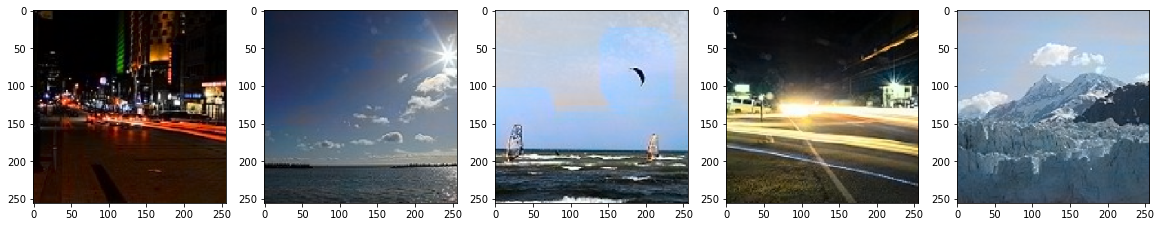

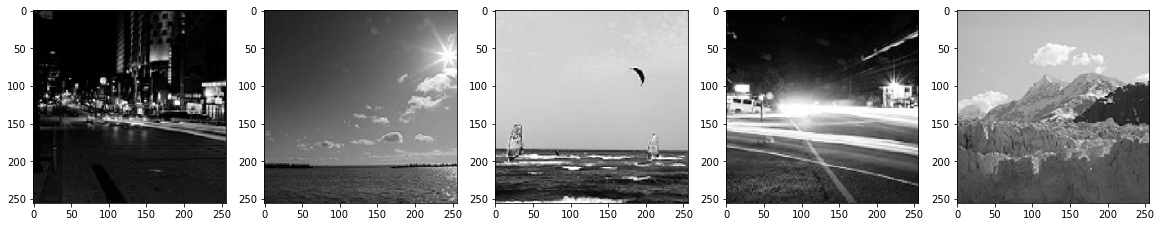

In [36]:
w=20
h=20
fig=plt.figure(figsize=(20 , 20))
columns = 5
rows = 1
for i in range(1, columns*rows +1):
    output1 = model.predict(X[i:i+1])

    output1 = output1*128

    result = np.zeros((256 , 256 , 3))

    result[:,:,0] = X[i][: , : , 0]

    result[:,:,1:] = output1[0] 

    img = lab2rgb(result)
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

w=20
h=20
fig=plt.figure(figsize=(20 , 20))
columns = 5
rows = 1
for i in range(1, columns*rows +1):
    img = X[i][: , : , 0]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img , "gray")
plt.show()